GeoPandas 是一个开源项目，它扩展了 pandas 数据结构以支持地理对象。它允许你轻松地在 Python 中进行地理空间操作。然而，GeoPandas 本身并不直接支持读取 .tif 文件（Tagged Image File Format，通常用于存储地理空间栅格数据）。要读取 .tif 文件，你通常会使用 rasterio 或 GDAL（Geospatial Data Abstraction Library）这样的库。

如果你想将 .tif 文件中的栅格数据与 GeoPandas 中的矢量数据结合使用，你需要分别读取这两种格式的数据，并可能需要在某些分析中结合使用它们。以下是一个基本的示例，说明如何使用 rasterio 读取 .tif 文件，并将其与 GeoPandas 结合使用（如果适用）：

首先，确保你已经安装了必要的库：

```bash
pip install geopandas rasterio
```


然后，你可以使用以下代码读取 .tif 文件：

请注意，上面的代码只是读取了 .tif 文件的一个波段，并计算了一些基本的统计信息。如果你想要进行更复杂的空间分析（比如将栅格数据裁剪到矢量数据的边界内），你可能需要使用更高级的功能，比如 rasterio 的 mask 函数来裁剪栅格数据，或者 rasterstats 库来计算矢量多边形内的栅格统计信息。

此外，如果你想要将栅格数据转换为矢量数据（例如，通过阈值将其转换为二值图像，并提取多边形），你可能需要使用更复杂的图像处理技术，这通常超出了 GeoPandas 的范围，但可以使用 rasterio、GDAL 或其他图像处理库来实现。

In [2]:
import rasterio  
import numpy as np  
import geopandas as gpd  
  
# 读取 .tif 文件  
with rasterio.open('data/高德.tif') as src:  
    band1 = src.read(1)  # 读取第一个波段的数据  
    metadata = src.meta  # 获取元数据  
  
# 现在你有一个 NumPy 数组 band1，它包含了栅格数据  
# 你可以进行各种分析，比如计算统计信息  
print(np.mean(band1))  # 计算平均值  
print(np.max(band1))  # 计算最大值  
  
# 如果你有与这个 .tif 文件对应的矢量数据（比如 shapefile），  
# 你可以使用 GeoPandas 读取它，并进行空间连接或其他操作  
gdf = gpd.read_file('data/homestead/homestead.shp',encoding="UTF8")  
gdf
# 这里你可以根据需要进行进一步的空间分析，比如裁剪栅格数据，或者将栅格数据的统计值连接到矢量数据上。

86.43644207317074
255


,name,id_card,tel_number,lon,lat,area,illegal_bu,building_t,address,place,geometry
0,刘一,230129200208261600,19876543901,117.537,34.9040,200,否,2003,市中区齐村镇刘峪村,山东省枣庄市,"POLYGON ((117.53669 34.90406, 117.53717 34.904..."
1,刘二,230129200208261601,19876543902,117.537,34.9041,237,否,2003,市中区齐村镇刘峪村,山东省枣庄市,"POLYGON ((117.53717 34.90407, 117.53721 34.904..."
2,刘三,230129200208261602,19876543903,117.537,34.9035,384,否,2004,市中区齐村镇刘峪村,山东省枣庄市,"POLYGON ((117.53672 34.90369, 117.53706 34.903..."
3,刘四,230129200208261603,19876543904,117.537,34.9035,598,否,2005,市中区齐村镇刘峪村,山东省枣庄市,"POLYGON ((117.53710 34.90358, 117.53729 34.903..."
4,刘武,230129200208261604,13567935678,117.537,34.9029,300,否,2006,市中区齐村镇刘峪村,山东省枣庄市,"POLYGON ((117.53666 34.90301, 117.53686 34.902..."
5,刘刘,230129200208261605,14578953456,117.537,34.9028,200,否,2005,市中区齐村镇刘峪村,山东省枣庄市,"POLYGON ((117.53698 34.90296, 117.53733 34.902..."
6,刘七,230129200208261606,13578086443,117.537,34.9031,300,否,2004,市中区齐村镇刘峪村,山东省枣庄市,"POLYGON ((117.53717 34.90325, 117.53741 34.903..."
7,刘八,230129200208261607,12456786543,117.538,34.9031,600,否,2007,市中区齐村镇刘峪村,山东省枣庄市,"POLYGON ((117.53742 34.90320, 117.53756 34.903..."
8,刘九,230129200208261608,13457887654,117.537,34.9035,654,否,2008,市中区齐村镇刘峪村,山东省枣庄市,"POLYGON ((117.53736 34.90358, 117.53757 34.903..."
9,刘时,230129200208261609,10865788665,117.538,34.9037,564,否,2009,市中区齐村镇刘峪村,山东省枣庄市,"POLYGON ((117.53754 34.90373, 117.53794 34.903..."


In [66]:
for i,ent in gdf.iterrows():
    poly = ent['geometry']
    poly

(984, 1000)
Polygon5((117.537, 34.9041) ...)
Polygon4((117.537, 34.9041) ...)
Polygon5((117.537, 34.9037) ...)
Polygon5((117.537, 34.9036) ...)
Polygon5((117.537, 34.903) ...)
Polygon5((117.537, 34.903) ...)
Polygon5((117.537, 34.9033) ...)
Polygon5((117.537, 34.9032) ...)
Polygon5((117.537, 34.9036) ...)
Polygon5((117.538, 34.9037) ...)
Polygon5((117.538, 34.9037) ...)
Polygon5((117.538, 34.9038) ...)
Polygon5((117.538, 34.9036) ...)
Polygon5((117.538, 34.9035) ...)
Polygon5((117.538, 34.9035) ...)
Polygon5((117.538, 34.9034) ...)
Polygon7((117.538, 34.9032) ...)
Polygon5((117.538, 34.9032) ...)
Polygon5((117.538, 34.9032) ...)
Polygon5((117.538, 34.903) ...)
Polygon5((117.538, 34.9029) ...)
Polygon5((117.538, 34.9029) ...)
Polygon5((117.538, 34.9027) ...)
Polygon5((117.539, 34.903) ...)
Polygon5((117.54, 34.9031) ...)
Polygon5((117.54, 34.9029) ...)
Polygon5((117.54, 34.9029) ...)
Polygon5((117.54, 34.9026) ...)
Polygon5((117.538, 34.9026) ...)
Polygon5((117.539, 34.9026) ...)
Polygo

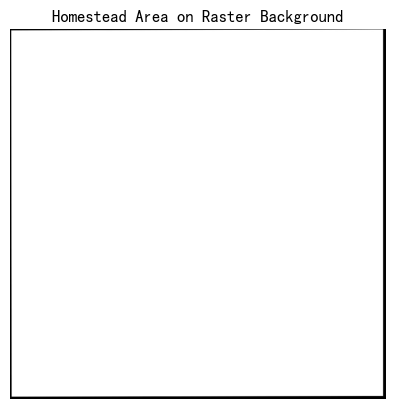

In [9]:
import rasterio  
import geopandas as gpd  
import matplotlib.pyplot as plt  
from descartes import PolygonPatch
from matplotlib.patches import Polygon as MplPolygon

# 读取.tif文件  
with rasterio.open('data/高德.tif') as src:  
    band1 = src.read(4)  
    plt.imshow(band1, cmap='gray')  # 显示栅格数据作为背景  
  
# 读取shp文件  
gdf = gpd.read_file('data/homestead/homestead.shp', encoding="UTF8")  
  
# 在栅格数据上绘制矢量边界  
for idx, homestead in gdf.iterrows():  
    poly = homestead['geometry']
    print(poly.exterior.coords)
    print(MplPolygon(list(np.array(poly.exterior.coords))))
    for i in poly.exterior.coords:
        arr = np.array(poly.exterior.coords)
        patch = MplPolygon(arr , fc='yellow', ec='red', alpha=0.5, zorder=2)  
        ax = plt.gca()  
        ax.add_patch(patch)  
  
# 设置地图的标题和坐标轴标签（如果需要的话）  
plt.title('Homestead Area on Raster Background')  
plt.axis('off')  # 关闭坐标轴显示  
  
# 显示地图  
plt.show()

C:\Users\Qingyuan_Qu\AppData\Local\Temp\ipykernel_13732\3072299497.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


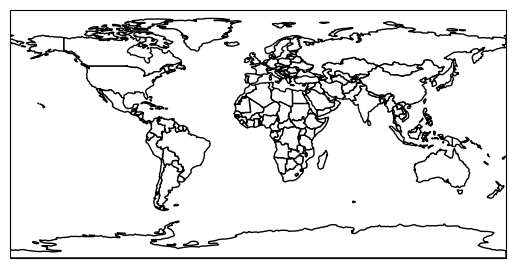

In [3]:
import geopandas as gpd  
import matplotlib.pyplot as plt  
import cartopy.crs as ccrs  
  
# 读取世界地图的shapefile  
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))  
  
# 创建一个地图并设置投影方式  
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.PlateCarree()})  
  
# 绘制世界地图  
world.plot(ax=ax, color='white', edgecolor='black')  
  
# 设置地图范围  
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())  
  
# 显示地图  
plt.show()

In [31]:
help(PolygonPatch)

Help on function PolygonPatch in module descartes.patch:

PolygonPatch(polygon, **kwargs)
    Constructs a matplotlib patch from a geometric object

    The `polygon` may be a Shapely or GeoJSON-like object with or without holes.
    The `kwargs` are those supported by the matplotlib.patches.Polygon class
    constructor. Returns an instance of matplotlib.patches.PathPatch.

    Example (using Shapely Point and a matplotlib axes):

      >>> b = Point(0, 0).buffer(1.0)
      >>> patch = PolygonPatch(b, fc='blue', ec='blue', alpha=0.5)
      >>> axis.add_patch(patch)



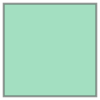

In [56]:
Polygon([(0, 0), (1, 0), (1, 1), (0, 1), (0, 0)]).reverse()

[(0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0)]


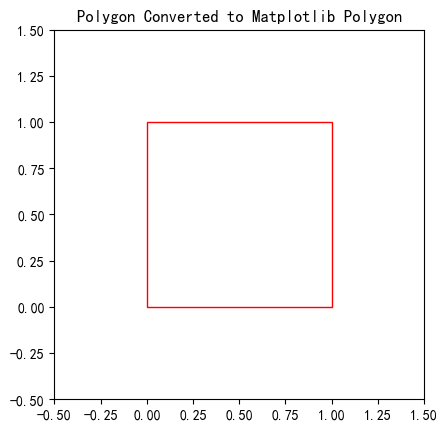

In [70]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon as MplPolygon

# 创建一个示例的 geopandas GeoDataFrame
# 这里示例中包含一个 Polygon 对象
polygon_coords = [(0, 0), (1, 0), (1, 1), (0, 1)]  # 定义一个简单的四边形
polygon = gpd.GeoDataFrame(geometry=[Polygon(polygon_coords)])

# 提取 Polygon 对象的顶点坐标
exterior_coords = polygon['geometry'].iloc[0].exterior.coords[:]
print(exterior_coords)
x, y = zip(*exterior_coords)  # 分离 x 坐标和 y 坐标

# 创建 matplotlib 的 Polygon 对象
mpl_polygon = MplPolygon(list(zip(x, y)), fill=None, edgecolor='red')  # 边框为红色，无填充

# 创建图形并绘制
fig, ax = plt.subplots()
ax.add_patch(mpl_polygon)  # 将 Polygon 添加到 Axes 中
ax.set_xlim(min(x) - 0.5, max(x) + 0.5)  # 设置 x 轴范围
ax.set_ylim(min(y) - 0.5, max(y) + 0.5)  # 设置 y 轴范围
ax.set_aspect('equal')  # 设置等比例显示
ax.set_title('Polygon Converted to Matplotlib Polygon')  # 设置标题

plt.show()


In [4]:
gdf = gpd.read_file('data/park1/Park1.shp', encoding="UTF8")  

In [5]:
gdf


,Id,name,pid,category,green_area,park_area,land_area,water_area,vagetation,notes,geometry
0,1,b'ccfab5c0d3cebbf7b6d3bccdc4eeb9dd',1,b'd7a8cce2b9abd4b0',55.6400,58.57,58.57,0.00,0.95,b'bda8b3c9c7f8c4da',"POLYGON ((117.27091 34.79212, 117.27442 34.792..."
1,2,b'c4cfb7bdd6b2ceefd4b0',2,b'd7a8cce2b9abd4b0',24.7100,36.71,36.71,12.00,0.57,b'bda8b3c9c7f8c4da',"POLYGON ((117.32125 34.80551, 117.32123 34.802..."
2,3,b'd1d8bad3b9abd4b0',3,b'd3ced4b0',14.5728,28.07,30.36,11.98,0.48,b'bda8b3c9c7f8c4da',"POLYGON ((117.26628 34.79193, 117.26211 34.785..."
